# Happiness Report Up to 2023


# Setup

In [ ]:
import pandas as pd
import altair as alt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pycaret.regression import *

sns.set_theme("paper")

In [ ]:
# Importing data
url = "https://drive.google.com/file/d/1lDPELArme4uqsrIAEAT6I_1yFmNcRSLb/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

# 1. Exploratory Data Analysis

In [ ]:
# Data
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [ ]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       158 non-null    object 
 1   region                        158 non-null    object 
 2   happiness_score               158 non-null    float64
 3   gdp_per_capita                158 non-null    float64
 4   social_support                158 non-null    float64
 5   healthy_life_expectancy       158 non-null    float64
 6   freedom_to_make_life_choices  158 non-null    float64
 7   generosity                    158 non-null    float64
 8   perceptions_of_corruption     158 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.2+ KB


In [ ]:
# There were no null values, but dropping na's just in case
df.dropna(inplace=True)

In [ ]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.237296,0.143422
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.126685,0.120034
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.150553,0.061675
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.216130,0.107220
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.309883,0.180255
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.795880,0.551910


In [ ]:
# Mean happiness score
mean_happiness_score = df["happiness_score"].mean()
print(f"The average happiness score is {round(mean_happiness_score, 3)}")

The average happiness score is 5.376


In [ ]:
def above_mean_score(score, mean_happiness_score):
    if score > mean_happiness_score:
        return "Above Mean", score - mean_happiness_score
    return "Below Mean", score - mean_happiness_score

temp_df = df["happiness_score"].apply(lambda x: above_mean_score(x, mean_happiness_score=df["happiness_score"].mean())).apply(pd.Series)
temp_df.columns = ["happiness_above_mean", "happiness_away_from_mean"]

df = pd.concat([df, temp_df], axis=1)

In [ ]:
# Looking at a subset of the dataframe
df[["country", "region", "happiness_score", "happiness_above_mean", "happiness_away_from_mean"]].head()

,country,region,happiness_score,happiness_above_mean,happiness_away_from_mean
0,Switzerland,Western Europe,7.587,Above Mean,2.211266
1,Iceland,Western Europe,7.561,Above Mean,2.185266
2,Denmark,Western Europe,7.527,Above Mean,2.151266
3,Norway,Western Europe,7.522,Above Mean,2.146266
4,Canada,North America and ANZ,7.427,Above Mean,2.051266


# 2. Visualizations

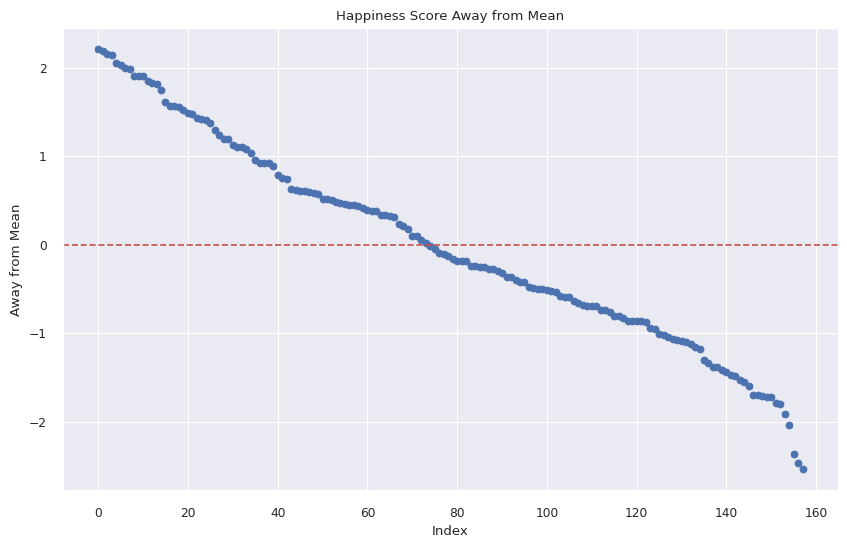

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["happiness_away_from_mean"])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Index")
plt.ylabel("Away from Mean")
plt.title("Happiness Score Away from Mean")
plt.grid(True)
plt.show()

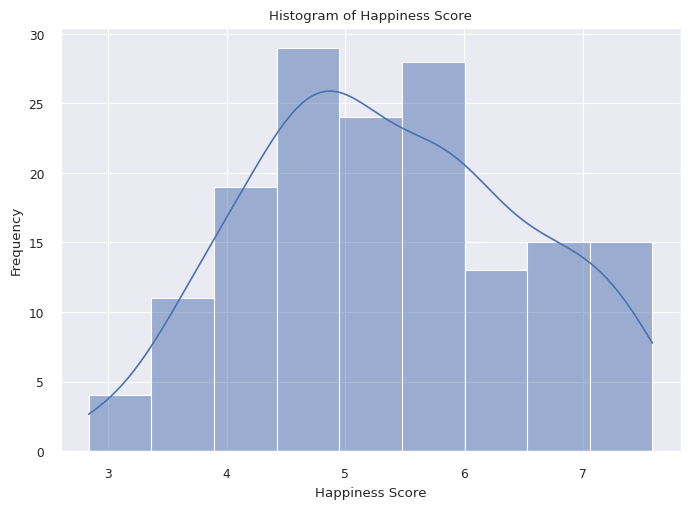

In [ ]:
# Histogram
sns.histplot(data=df, x='happiness_score', kde=True)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Histogram of Happiness Score')
plt.show()

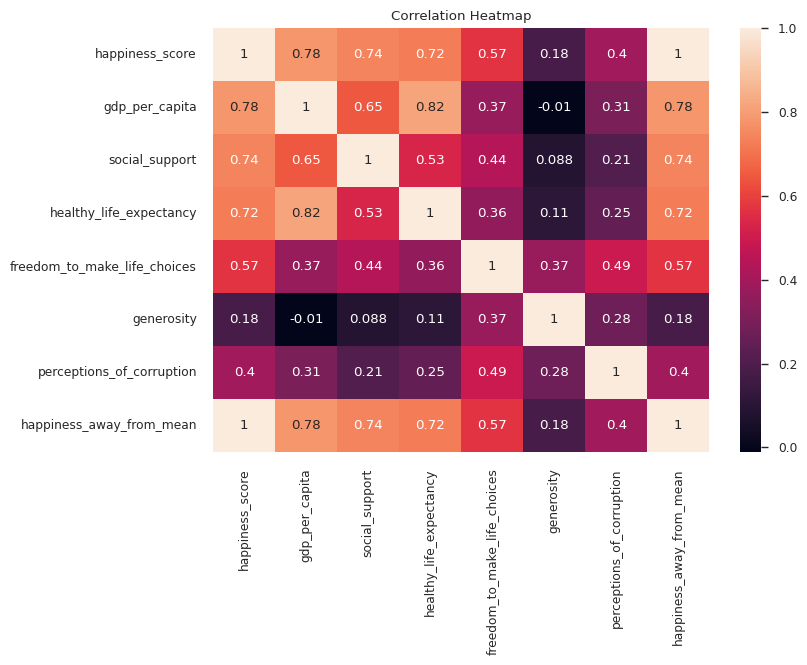

In [ ]:
# Correlations
correlation_table = df.corr(numeric_only=True)
plt.title("Correlation Heatmap")
sns.heatmap(correlation_table, annot=True);

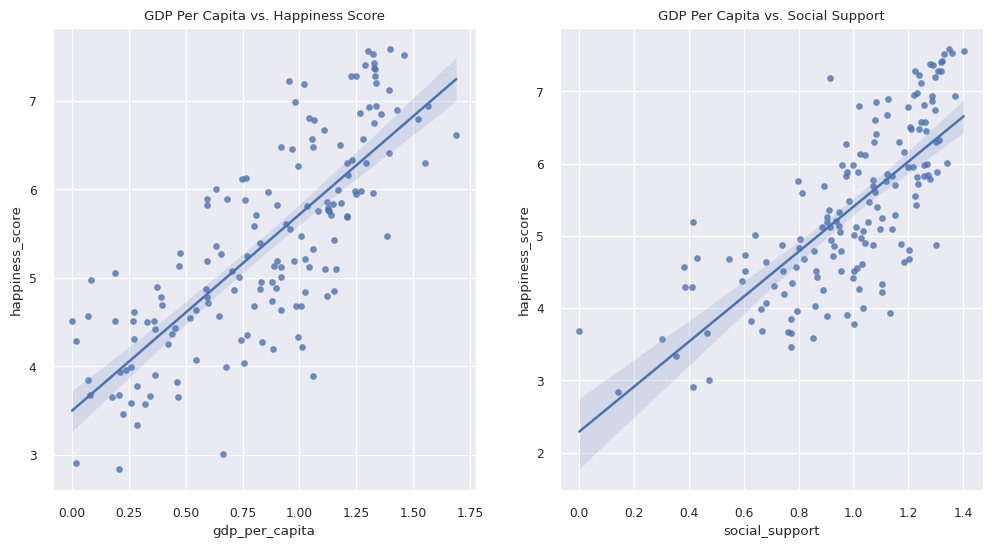

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
fig1 = sns.regplot(x="gdp_per_capita", y="happiness_score", data=df, ax=ax[0])
fig1.set_title("GDP Per Capita vs. Happiness Score");

fig2 = sns.regplot(x="social_support", y="happiness_score", data=df, ax=ax[1])
fig2.set_title("GDP Per Capita vs. Social Support");

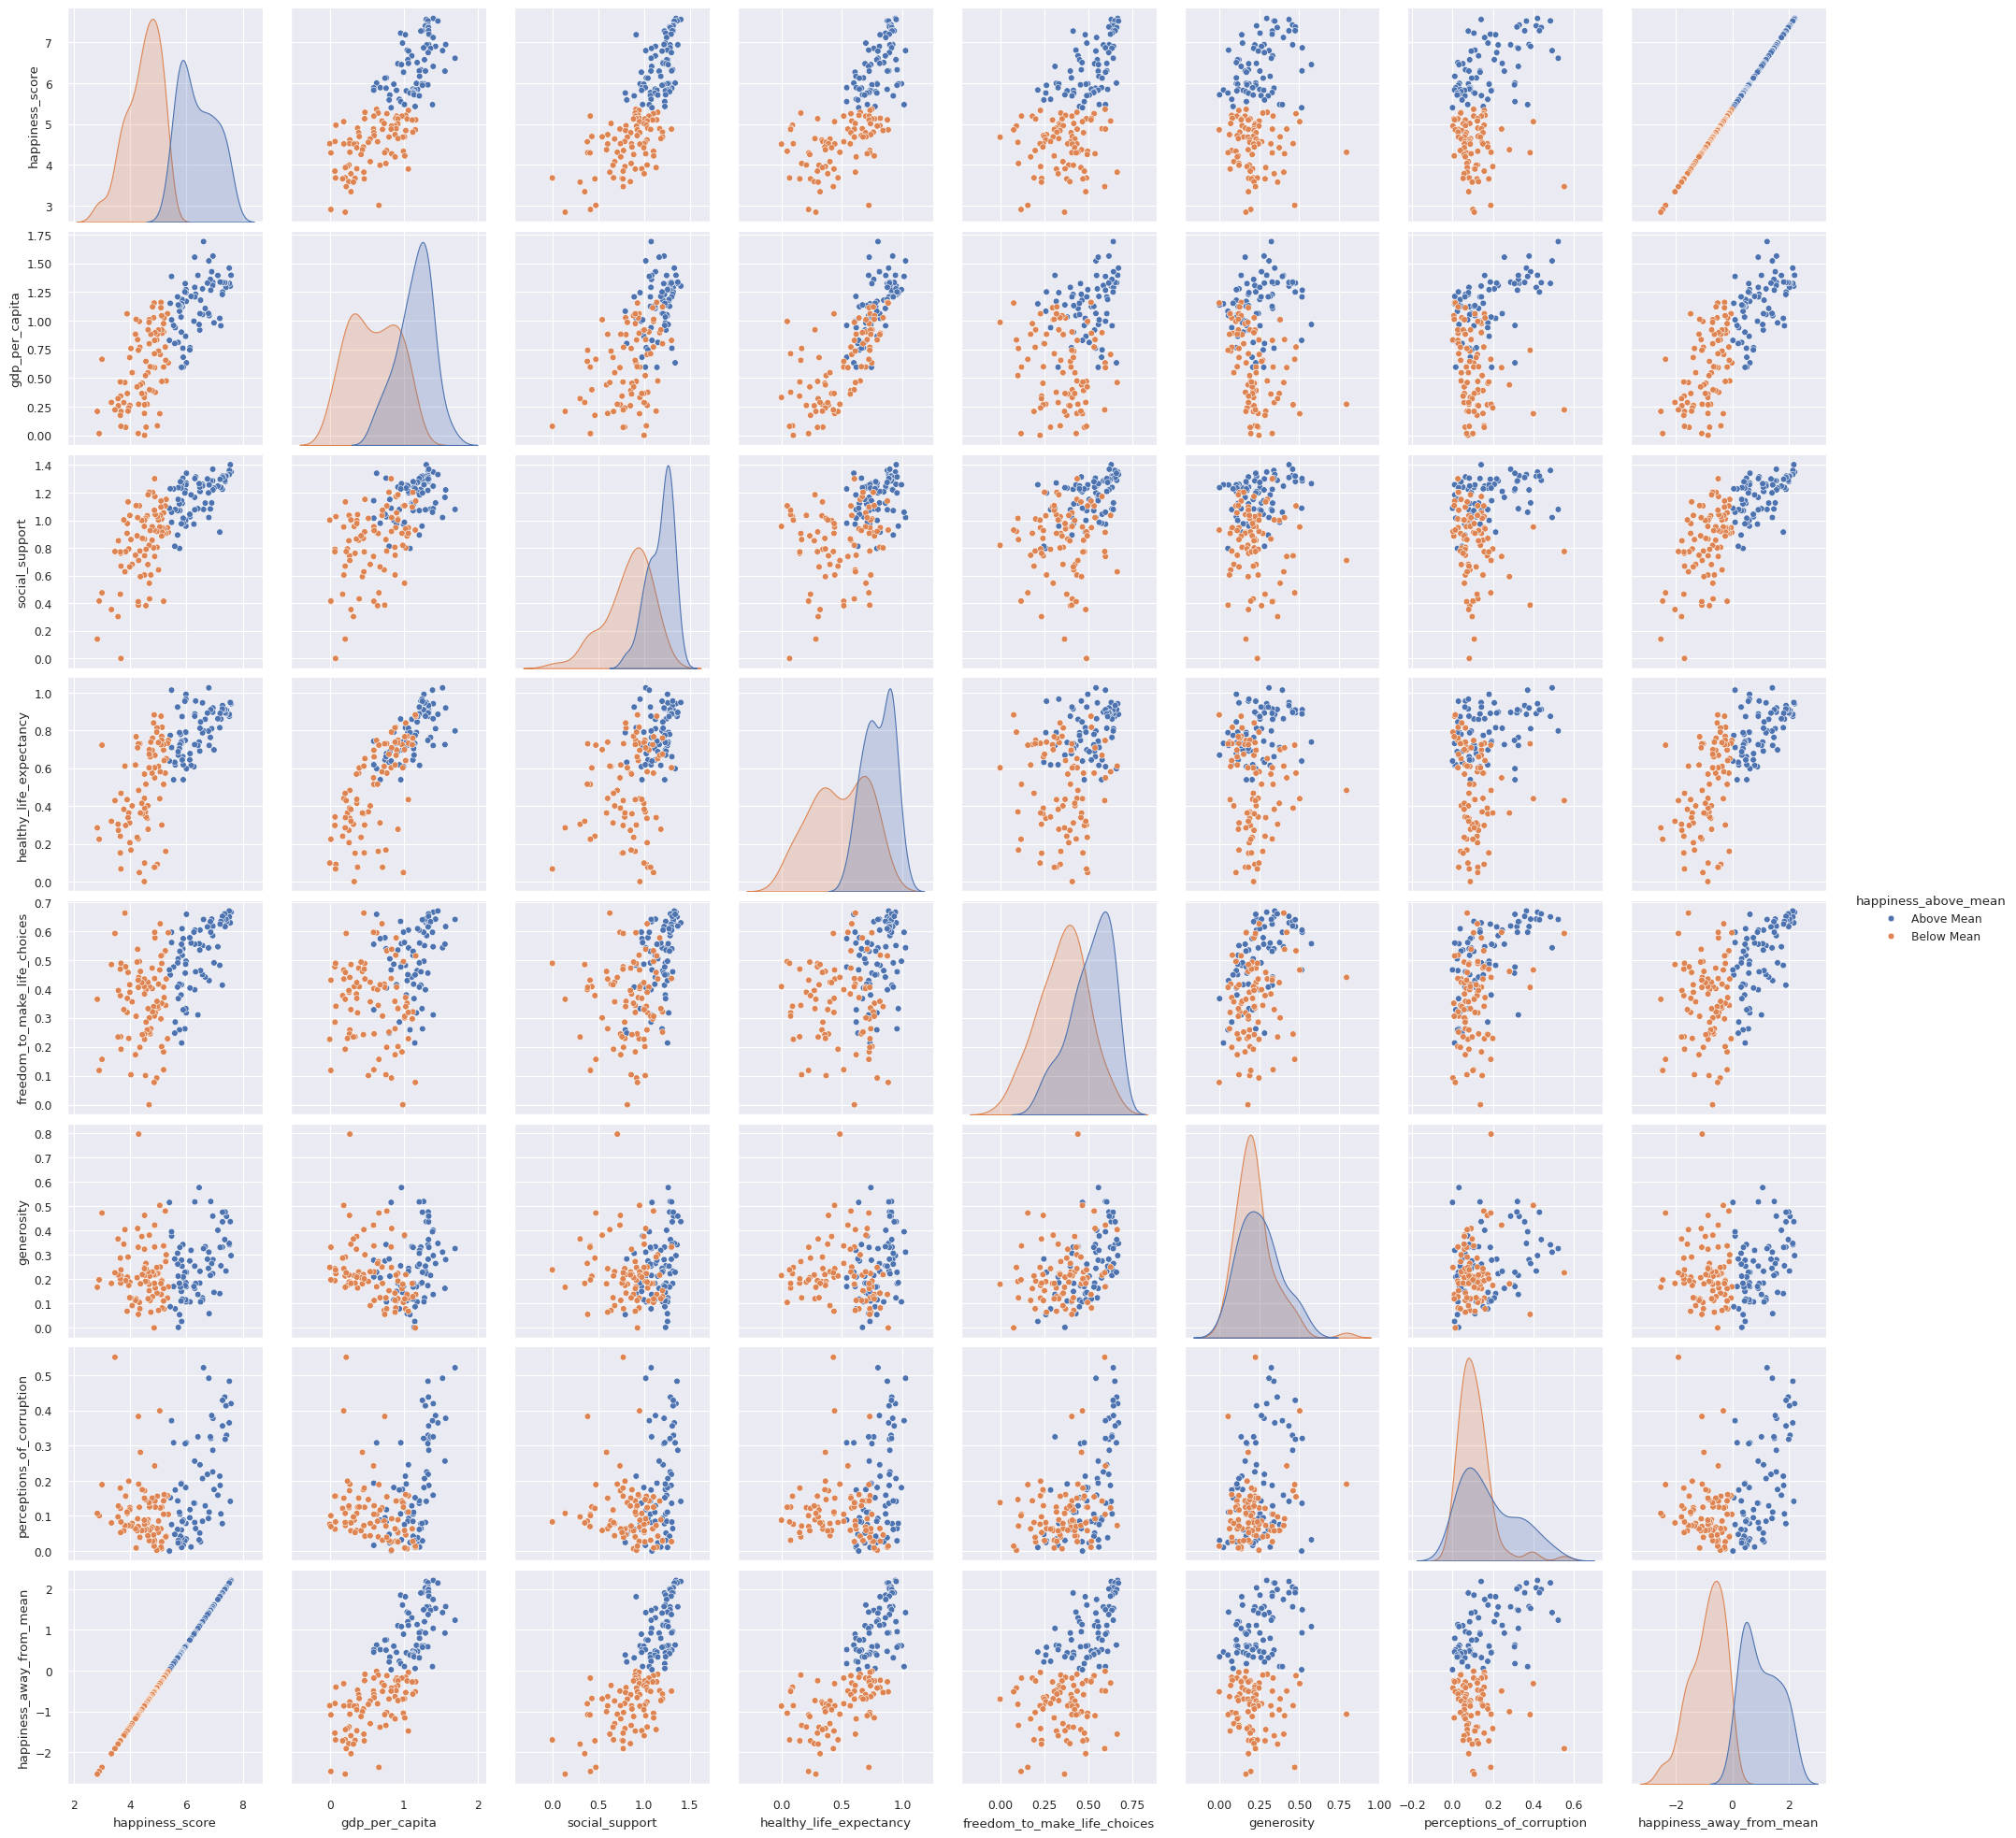

In [ ]:
# Pairplot
sns.pairplot(data=df, hue="happiness_above_mean");

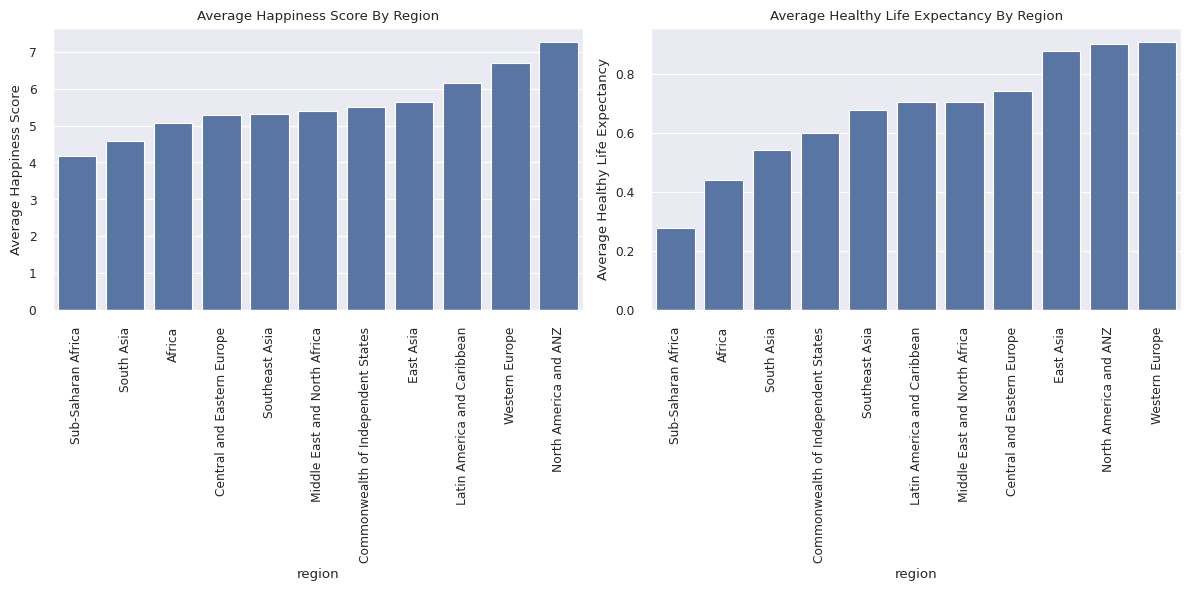

In [ ]:
# Happiness Score By Region
mean_happiness_score_by_region = df.groupby(by="region")['happiness_score'].mean().sort_values()

# Life expectancy by region
mean_healthy_life_expectancy = df.groupby(by="region")['healthy_life_expectancy'].mean().sort_values()

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

fig2 = sns.barplot(x=mean_happiness_score_by_region.index, y=mean_happiness_score_by_region.values, ax=ax[0])
fig2.set_title("Average Happiness Score By Region")
fig2.set_ylabel("Average Happiness Score")
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=90);

fig3 = sns.barplot(x=mean_healthy_life_expectancy.index, y=mean_healthy_life_expectancy.values, ax=ax[1])
fig3.set_title("Average Healthy Life Expectancy By Region")
fig3.set_ylabel("Average Healthy Life Expectancy")
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=90);

plt.tight_layout()
plt.show()

In [ ]:
# Happiness Score Distribution By Region (Tyler)
fig = px.box(df, x='region', y='happiness_score',
             title='Happiness Score Distribution by Region',
             labels={'Happiness Score': 'Happiness Score', 'Region': 'Region'})
fig.show()

In [ ]:
#Interactive Scatter Plot
Scatterplot = alt.Chart(df).mark_circle().encode(
    x='gdp_per_capita:Q',
    y='happiness_score:Q',
    size=alt.Size('social_support:Q', scale=alt.Scale(range=[50, 500])),
    color='region:N',
    tooltip=['country', 'region', 'happiness_score', 'gdp_per_capita', 'social_support']
).properties(
    width=600,
    height=400
).interactive()
Scatterplot

alt.Chart(...)

# 3. Ridge Regression Modeling

In [ ]:
# Model layout
exp_name = setup(data=df, target='happiness_score')

,Description,Value
0,Session id,2092
1,Target,happiness_score
2,Target type,Regression
3,Original data shape,"(158, 11)"
4,Transformed data shape,"(158, 21)"
5,Transformed train set shape,"(110, 21)"
6,Transformed test set shape,"(48, 21)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


In [ ]:
# Best models to predict happiness score
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1030
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1010
br,Bayesian Ridge,0.0160,0.0004,0.0188,0.9997,0.0032,0.0032,0.1030
ridge,Ridge Regression,0.0280,0.0012,0.0340,0.9989,0.0059,0.0057,0.1080
huber,Huber Regressor,0.1205,0.0205,0.1414,0.9812,0.0239,0.0242,0.1900
par,Passive Aggressive Regressor,0.1325,0.0279,0.1642,0.9741,0.0285,0.0273,0.1020
knn,K Neighbors Regressor,0.1862,0.0662,0.2538,0.9364,0.0418,0.0370,0.1500
et,Extra Trees Regressor,0.4209,0.2704,0.5079,0.7581,0.0833,0.0848,0.2230
gbr,Gradient Boosting Regressor,0.5073,0.3970,0.6194,0.6359,0.1033,0.1047,0.2790
rf,Random Forest Regressor,0.5314,0.4271,0.6404,0.6217,0.1053,0.1082,0.2640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
#  Fit the model
lr = create_model('ridge')

# Launch evaluate widget
evaluate_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0262,0.0011,0.0327,0.9989,0.0043,0.0043
1,0.0226,0.0006,0.0252,0.9994,0.0036,0.0039
2,0.0166,0.0005,0.0224,0.9989,0.0030,0.0027
3,0.0316,0.0014,0.0370,0.9986,0.0060,0.0061
4,0.0353,0.0020,0.0452,0.9984,0.0083,0.0077
5,0.0362,0.0017,0.0414,0.9991,0.0091,0.0091
6,0.0280,0.0014,0.0368,0.9988,0.0078,0.0067
7,0.0263,0.0009,0.0306,0.9992,0.0044,0.0045
8,0.0200,0.0005,0.0234,0.9992,0.0041,0.0042


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…